Subquestion 3: Effect of remote and hybrid working on peak-hour / off peak-hour demand

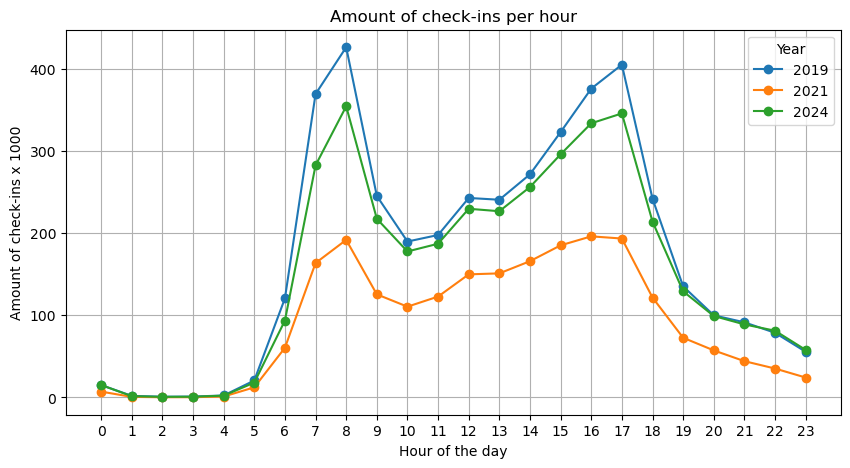

In [ ]:
#Import libraries
import pandas as pd
import os
import matplotlib.pyplot as plt

#Path to datafolder, , sep=';' is necessary to ensure 'Hour' and 'Series 1' end up in different columns
df_2019 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2019_workingdays_allmonths.csv", sep=';')
df_2021 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2021_workingdays_allmonths.csv", sep=';')
df_2024 = pd.read_csv(r"c:\Users\stepk\OneDrive - Delft University of Technology\TIL\TIL 6022\groep 24 data\q3_2024_workingdays_allmonths.csv", sep=';')

#renaming column names
for df in [df_2019, df_2021, df_2024]:
    df.columns = ['hour', 'check-ins']
    #Ensure column hour is read as integer
    df['hour'] = df['hour'].astype(int)
    #In the CSV numbers have comma's instead of dots
    df['check-ins'] = df['check-ins'].str.replace(',', '.').astype(float)

#Plot graph
plt.figure(figsize=(10, 5))

#2019
hourly_2019 = df_2019.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2019['hour'], hourly_2019['check-ins'], marker='o', label='2019')

#2021
hourly_2021 = df_2021.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2021['hour'], hourly_2021['check-ins'], marker='o', label='2021')

#2024
hourly_2024 = df_2024.groupby('hour')['check-ins'].sum().reset_index()
plt.plot(hourly_2024['hour'], hourly_2024['check-ins'], marker='o', label='2024')

#Plot table
plt.title("Amount of check-ins per hour")
plt.xlabel("Hour of the day")
plt.ylabel("Amount of check-ins x 1000")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Year")
plt.show()